# This notebook is for investigating the efficiency of Bisection Search against polynomial degree

In [1]:
from src.solvers import BisectionSolver
import numpy as np
import matplotlib.pyplot as plt

Generate random polynomials

In [17]:
import random

def generate_polynomial_coefficients(degree, a, b):
    """chooses coefficients for a polynomial of the given degree, such that f(a) == b"""

    #to fit only one data point, we can choose arbitrary values for every coefficient except one, which we initially set to zero.
    coefficients = [0] + [random.randint(-10, 10) for _ in range(degree-1)]

    #now calculate f(a). This will probably not be equal to b, initially.
    y = sum(coefficient * a**n for n, coefficient in enumerate(coefficients))

    #setting the final coefficient to their difference will cause f(a) to equal b.
    coefficients[0] = b - y

    
    return coefficients

def generate_random_polynomial(degree, x_at_root):
    random_coefficients = generate_polynomial_coefficients(degree, x_at_root, 0)
    random_polynomial_function = lambda x: sum(coefficient * x**n for n, coefficient in enumerate(random_coefficients))
    return random_polynomial_function

degree = 4
x_at_root = 1

random_polynomial_function = generate_random_polynomial(degree, x_at_root)

Plot and make sure they look sensible

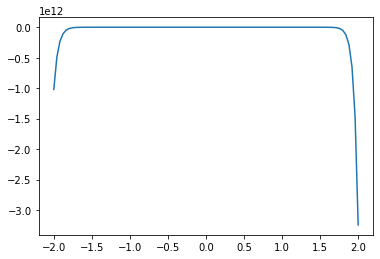

In [24]:
x_to_plot = np.linspace(-2, 2, 100)
plt.plot(x_to_plot, random_polynomial_function(x_to_plot))

Check that bisection solver does what we expect it to

In [19]:
bisection_solver = BisectionSolver(random_polynomial_function, upper_bound=2, lower_bound=-2)
root = bisection_solver.return_root(n_iter=100, eta=1e-3)
print(f'Root found: {root:.3f} with value {random_polynomial_function(root)}')

Root found: 1.000 with value 0.0


Lets loop over many random polynomials

In [35]:
def return_mean_error(degree: int, n_rand: int = 100, n_iter: int = 100, eta: float = 1e-6):
    error_values = []
    for _ in range(n_rand):
        random_polynomial_function = generate_random_polynomial(degree, x_at_root)
        bisection_solver = BisectionSolver(random_polynomial_function, upper_bound=2, lower_bound=-2)
        root = bisection_solver.return_root(n_iter=100, eta=1e-6)
        error_values.append(abs(random_polynomial_function(root)))
    return np.mean(error_values)

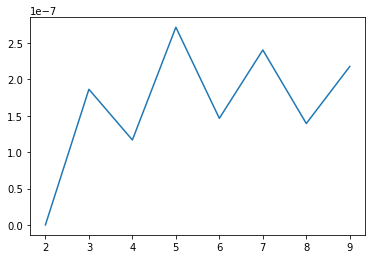

In [37]:
degrees_to_plot = [x for x in range(2,10)]
mean_errors = [return_mean_error(degree) for degree in degrees_to_plot]
plt.plot(degrees_to_plot, mean_errors) 